<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
# IMPORT LABRARIES

# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_theme()
plt.style.use('ggplot')
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(12,8)

In [214]:
cancer = pd.read_csv('breast-cancer-wisconsin-data.csv')

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [215]:
cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to age specifically, so we are leaving age out.

In [216]:
# ANSWER

cancer = cancer.drop(['Unnamed: 32'], axis=1)
X = cancer.drop(['id','diagnosis'], axis=1)
y = cancer['diagnosis'].map({'M':1, 'B':0})
X_cols = X.columns

In [217]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

X = pd.DataFrame(data=X, columns = X_cols)

In [218]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [219]:
X.corr().head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


In [220]:
# ANSWER

corr = X.corr()

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [221]:
# ANSWER

eigenvalues, eigenvectors = np.linalg.eig(corr)

In [238]:
eigenvalues

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 1.33044823e-04,
       7.48803097e-04, 1.58933787e-03, 6.90046388e-03, 8.17763986e-03,
       1.54812714e-02, 1.80550070e-02, 2.43408378e-02, 2.74394025e-02,
       3.11594025e-02, 2.99728939e-02])

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [224]:
def calculate_cum_var_exp(eig_vals):
    eigval_sum = sum(eigenvalues)
    cum_var_exp = []
    for i in eigenvalues:
        cum_var_exp.append((i/eigval_sum)*100)
    return cum_var_exp

In [225]:
calculate_cum_var_exp(eigenvalues)

[44.27202560752636,
 18.971182044033092,
 9.393163257431377,
 6.602134915470163,
 5.49576849234626,
 4.024522039883347,
 2.2507337129825027,
 1.5887238000213262,
 1.3896493745591096,
 1.1689781894131481,
 0.9797189875980168,
 0.8705379007378808,
 0.804524987196732,
 0.5233657454926344,
 0.31378321676273896,
 0.2662093365152311,
 0.1979967925324298,
 0.17539594502264044,
 0.16492530592251647,
 0.0004434827427359022,
 0.002496010324689144,
 0.005297792903809614,
 0.023001546250599053,
 0.027258799547750876,
 0.05160423791651976,
 0.060183356667165185,
 0.08113612588991087,
 0.09146467510543302,
 0.10386467483386999,
 0.09990964637002486]

In [226]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

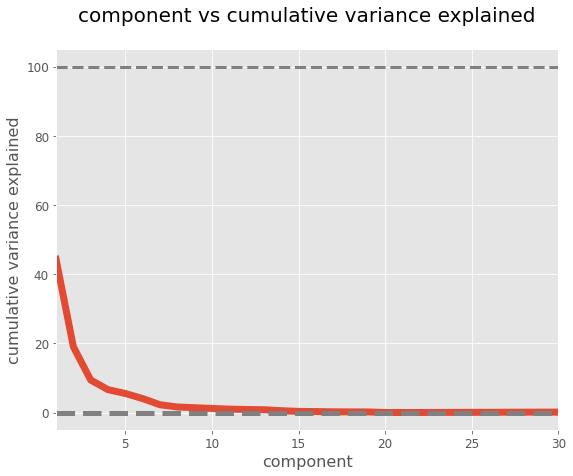

In [227]:
plot_var_exp(eigenvalues)

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [228]:
# ANSWER
# Create an instance of PCA
from sklearn.decomposition import PCA

n_comp = 6
pca = PCA(n_comp)

# Fit Xs
pca.fit(X)


PCA(n_components=6)

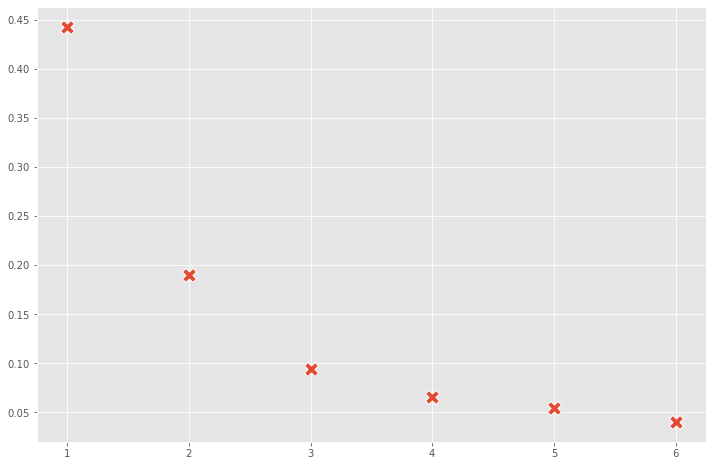

In [229]:
# ANSWER
# Plot explained_variance_

pca_exp_ratio = pca.explained_variance_ratio_  # 6 values
n = np.arange(1,n_comp+1) # running numbers from 1 to 6
sns.scatterplot(n, pca_exp_ratio, s=200, marker='X');

In [239]:
pca_exp_ratio

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522])

In [230]:
# ANSWER
# Apply dimensionality reduction to Xs using transform

princ_components = pca.transform(X)

In [231]:
princ_components_df = pd.DataFrame(data=princ_components, columns=['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6'])

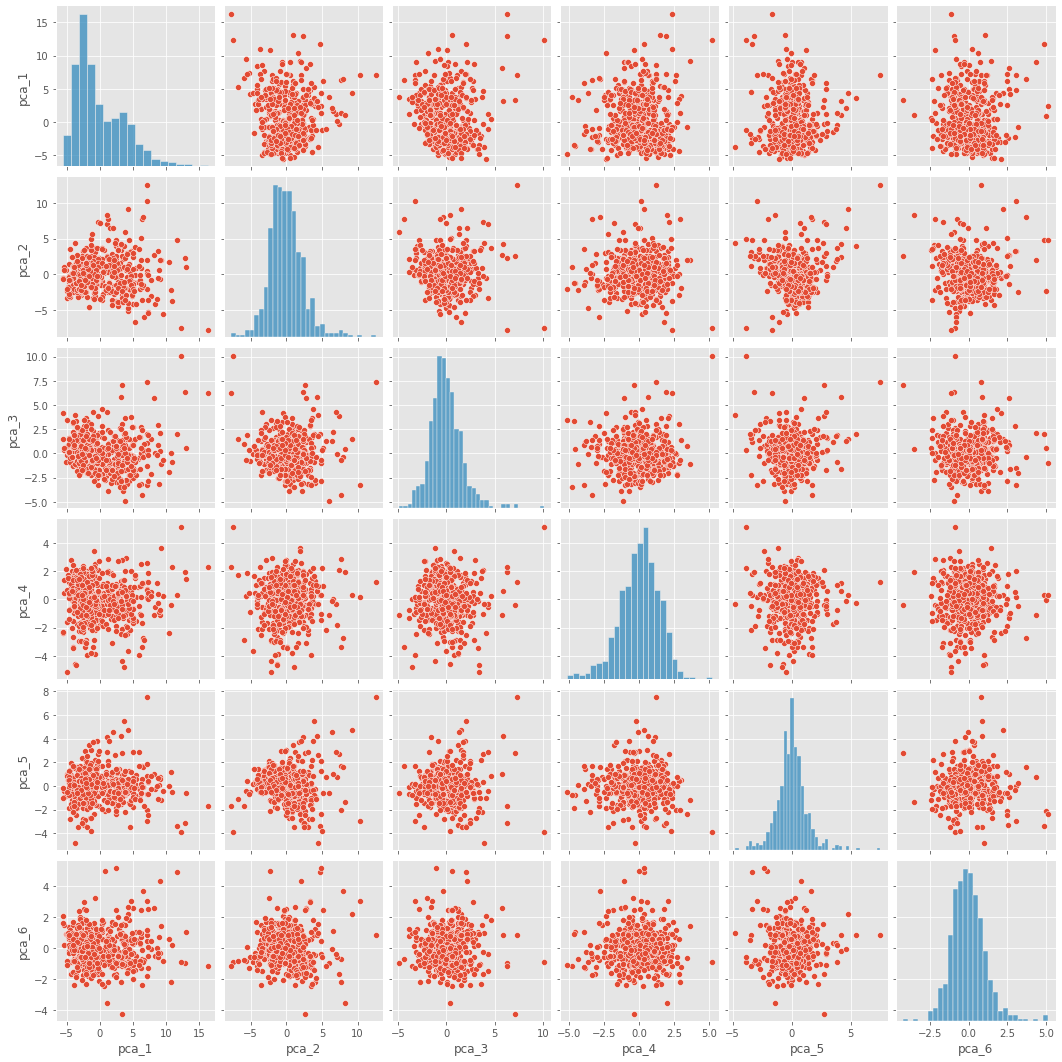

In [232]:
# ANSWER
# Create PairPlot of PCA

sns.pairplot(princ_components_df);

### 7. Split Data to 80/20 and Use PCA you gon in 6 as X

Split data 80/20 and Use KNN to find score.

In [233]:
# ANSWER
# Split Data

from sklearn.model_selection import train_test_split

In [234]:
X = princ_components_df

In [235]:
X.head() # y has been assigned earlier in sub-title 3 

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495


In [236]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=1)

In [237]:
# prediction using KNearest Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc = np.mean(y_pred == y_test)
print(f"The accuarcy score of KNN is {acc:.2f}")

The accuarcy score of KNN is 0.96


In [0]:
# ANSWER

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



